In [17]:
import pandas as pd
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

dataname = "decisionTree_regression_max_depth_3"

DATA_PATH = "../../Datasets/Vehice dataset/Downsampled/Test/test_sampled.csv"
OUTPUT_PATH = f"../../Datasets/Evaluations/Regression/{dataname}.csv"

TEST_PATH = "../../Datasets/Vehice dataset/Downsampled/Test/test_sampled.csv"
TRAIN_PATH = "../../Datasets/Vehice dataset/Downsampled/Train/train.csv"
VALID_PATH = "../../Datasets/Vehice dataset/Downsampled/Valid/valid.csv"




In [18]:
df_samples = pd.read_csv(DATA_PATH)
df_test = pd.read_csv(DATA_PATH)
df_train = pd.read_csv(TRAIN_PATH)

df_test.drop(columns=['prediction', 'prompt'], inplace=True)
df_samples.drop(columns=['prediction', 'prompt'], inplace=True)
print(df_samples.head())

                                    name  year  selling_price  km_driven  \
0     Ford Figo Aspire 1.5 TDCi Titanium  2017         670000      70000   
1  Mahindra Scorpio VLX 2WD AIRBAG BSIII  2012         525000     120000   
2                 Maruti Swift Dzire VDI  2014         438999      81000   
3              Ford Figo Diesel Titanium  2010         144000      50000   
4                 Hyundai i10 Magna 1.1L  2008         185000     110000   

     fuel seller_type transmission                 owner     mileage   engine  \
0  Diesel  Individual       Manual           First Owner  25.83 kmpl  1498 CC   
1  Diesel  Individual       Manual           First Owner  12.05 kmpl  2179 CC   
2  Diesel      Dealer       Manual           First Owner   23.4 kmpl  1248 CC   
3  Diesel  Individual       Manual          Second Owner   20.0 kmpl  1399 CC   
4  Petrol  Individual       Manual  Fourth & Above Owner  19.81 kmpl  1086 CC   

   max_power               torque  seats  
0     99 bhp 

In [19]:

df_samples = df_samples.dropna(how='any')

df_samples['prediction'] = None
df_samples["prompt"] = f'{dataname}'
df_samples["prompt_name"] = f'{dataname}'
df_samples["model_name"] = f'{dataname}'


In [20]:
def pre_process(df):
    df['year'] = 2020 - df['year']
    df['mileage'] = df['mileage'].str.replace(' kmpl', '', regex=False)
    df['mileage'] = df['mileage'].str.replace(' km/kg', '', regex=False)
    df['mileage'] = pd.to_numeric(df['mileage'])

    df['engine'] = df['engine'].str.replace(' CC', '', regex=False)
    df['engine'] = pd.to_numeric(df['engine'])


    df['max_power'] = df['max_power'].str.replace(' bhp', '', regex=False)
    df['max_power'] = pd.to_numeric(df['max_power'])
    
    df = df.dropna(how='any')
    return df

df_train = pre_process(df_train)
df_test = pre_process(df_test)

print(df_samples.head())

                                    name  year  selling_price  km_driven  \
0     Ford Figo Aspire 1.5 TDCi Titanium  2017         670000      70000   
1  Mahindra Scorpio VLX 2WD AIRBAG BSIII  2012         525000     120000   
2                 Maruti Swift Dzire VDI  2014         438999      81000   
3              Ford Figo Diesel Titanium  2010         144000      50000   
4                 Hyundai i10 Magna 1.1L  2008         185000     110000   

     fuel seller_type transmission                 owner     mileage   engine  \
0  Diesel  Individual       Manual           First Owner  25.83 kmpl  1498 CC   
1  Diesel  Individual       Manual           First Owner  12.05 kmpl  2179 CC   
2  Diesel      Dealer       Manual           First Owner   23.4 kmpl  1248 CC   
3  Diesel  Individual       Manual          Second Owner   20.0 kmpl  1399 CC   
4  Petrol  Individual       Manual  Fourth & Above Owner  19.81 kmpl  1086 CC   

   max_power               torque  seats prediction  \
0

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

X_train = df_train.drop('selling_price', axis=1)
y_train = df_train['selling_price']
X_test = df_test.drop('selling_price', axis=1)
y_test = df_test['selling_price']

categorical_features = ['name', 'fuel', 'seller_type', 'transmission', 'owner', 'torque']

preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'), categorical_features)],
    remainder='passthrough'  
)

X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

model = DecisionTreeRegressor(random_state=42, max_depth=3)
model.fit(X_train_transformed, y_train)

y_train_pred = model.predict(X_train_transformed)
y_test_pred = model.predict(X_test_transformed)

train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Training RMSE: {train_rmse}")
print(f"Test RMSE: {test_rmse}")
print(f"Training R^2: {train_r2}")
print(f"Test R^2: {test_r2}")



Training RMSE: 322424.71606036025
Test RMSE: 337970.7540404639
Training R^2: 0.8437318165304825
Test R^2: 0.7819263841612509


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [22]:
df_samples['prediction'] = y_test_pred

In [23]:
print(df_samples.head())

                                    name  year  selling_price  km_driven  \
0     Ford Figo Aspire 1.5 TDCi Titanium  2017         670000      70000   
1  Mahindra Scorpio VLX 2WD AIRBAG BSIII  2012         525000     120000   
2                 Maruti Swift Dzire VDI  2014         438999      81000   
3              Ford Figo Diesel Titanium  2010         144000      50000   
4                 Hyundai i10 Magna 1.1L  2008         185000     110000   

     fuel seller_type transmission                 owner     mileage   engine  \
0  Diesel  Individual       Manual           First Owner  25.83 kmpl  1498 CC   
1  Diesel  Individual       Manual           First Owner  12.05 kmpl  2179 CC   
2  Diesel      Dealer       Manual           First Owner   23.4 kmpl  1248 CC   
3  Diesel  Individual       Manual          Second Owner   20.0 kmpl  1399 CC   
4  Petrol  Individual       Manual  Fourth & Above Owner  19.81 kmpl  1086 CC   

   max_power               torque  seats     prediction 

In [24]:
df_samples.to_csv(OUTPUT_PATH, index=False)


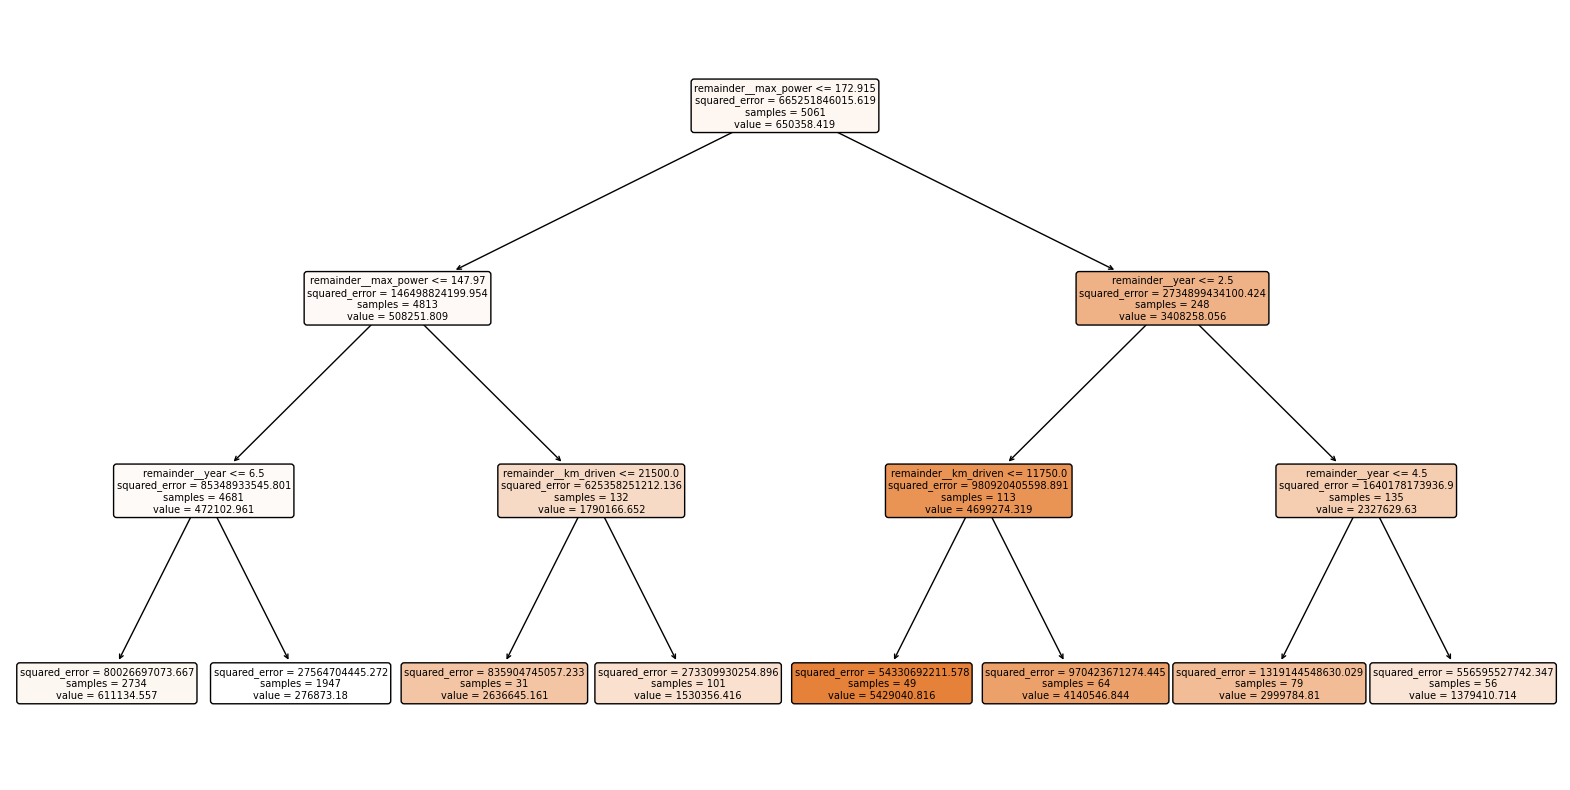

In [34]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(model, filled=True, feature_names=preprocessor.get_feature_names_out(), rounded=True)
plt.show()


In [26]:
# Extract feature importances
importances = model.feature_importances_

# Get feature names from the preprocessor
# Note: Adjust this if your sklearn version doesn't support `get_feature_names_out` directly
feature_names = preprocessor.get_feature_names_out()

# Create a DataFrame to visualize the feature importances
import pandas as pd

feature_importances_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Sort the DataFrame to see the most important features at the top
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

print(feature_importances_df)


                                                Feature  Importance
2044                               remainder__max_power    0.738631
2040                                    remainder__year    0.184073
2041                               remainder__km_driven    0.032031
2043                                  remainder__engine    0.008113
2042                                 remainder__mileage    0.007149
...                                                 ...         ...
617   onehot__name_Jaguar XF 3.0 Litre S Premium Luxury    0.000000
618               onehot__name_Jeep Compass 1.4 Limited    0.000000
624        onehot__name_Jeep Compass 2.0 Longitude BSIV    0.000000
626        onehot__name_Jeep Wrangler 2016-2019 3.6 4X4    0.000000
627                       onehot__name_Kia Seltos HTE D    0.000000

[2046 rows x 2 columns]


In [9]:
print(f"Depth of the decision tree: {model.get_depth()}")

Depth of the decision tree: 42


In [13]:

row_transformed = preprocessor.transform(X_train.iloc[[0]]) 


path = model.decision_path(row_transformed)


print("The decision path taken by the first row is:")
node_indicator = path.indices
for node_id in node_indicator:
    if model.tree_.children_left[node_id] == model.tree_.children_right[node_id]:
        print(f"Leaf node reached: {node_id}")
    else:
        if row_transformed[0, model.tree_.feature[node_id]] <= model.tree_.threshold[node_id]:
            print(f"Go to the left child of node {node_id}")
        else:
            print(f"Go to the right child of node {node_id}")


The decision path taken by the first row is:
Go to the left child of node 0
Go to the left child of node 1
Go to the right child of node 2
Go to the right child of node 4324
Go to the right child of node 6884
Go to the left child of node 7196
Go to the left child of node 7197
Go to the right child of node 7198
Go to the left child of node 7284
Go to the right child of node 7285
Go to the right child of node 7371
Go to the left child of node 7429
Go to the left child of node 7430
Go to the left child of node 7431
Leaf node reached: 7432


In [14]:

feature_importances = model.feature_importances_

involved_features = set(model.tree_.feature[node_id] for node_id in node_indicator if node_id != model.tree_.node_count - 1)

print("Feature importances for the involved features in the path:")
for feature_idx in involved_features:
    if feature_idx >= 0: 
        feature_name = preprocessor.get_feature_names_out()[feature_idx]
        importance = feature_importances[feature_idx]
        print(f"Feature: {feature_name}, Importance: {importance}")


Feature importances for the involved features in the path:
Feature: onehot__name_Honda Civic 1.8 V MT, Importance: 1.48528704202728e-08
Feature: onehot__owner_Third Owner, Importance: 8.458073166872292e-05
Feature: remainder__year, Importance: 0.18407307740046033
Feature: remainder__km_driven, Importance: 0.032030899673075826
Feature: onehot__torque_20.4@ 1400-3400(kgm@ rpm), Importance: 0.00046151264265620047
Feature: remainder__max_power, Importance: 0.7386312436579889
Feature: remainder__seats, Importance: 0.0007217285952897194
Feature: onehot__torque_172Nm@ 4300rpm, Importance: 9.194269520477038e-06
